# Comparison of GPU Perofrmance in Simplified CFD Problems by Using OpenMP, OpenACC, and CUDA

['PTL50.csv', 'PTL20.csv', 'PTL1.csv', 'PTL10.csv', 'PTL2.csv', 'PTL5.csv']

----print the simulation times of various method---------

            Types     PTL50     PTL20      PTL1     PTL10      PTL2      PTL5
0      CpuFortran  2.207332  1.003211  0.206994  0.576055  0.260849  0.355474
1      NormalCuda  1.330830  0.788188  0.476343  0.588615  0.488275  0.532761
2          CudaMg  0.897855  0.368222  0.036235  0.192970  0.051878  0.104028
3      CudaMgAuto  0.875962  0.354174  0.024483  0.180283  0.041428  0.093021
4      CudaDevice  0.897759  0.368775  0.034750  0.191371  0.050816  0.103735
5  CudaDeviceAuto  0.876204  0.355286  0.023372  0.179215  0.040700  0.092876
6         OpenAcc  0.700131  0.301986  0.049534  0.165025  0.060753  0.098424
7          CpuOmp  1.850582  0.625709  0.158235  0.389325  0.225719  0.356870

----print the spead up X times compared to the pure cpu fortran method---------

            Types     PTL50     PTL20      PTL1     PTL10      PTL2      PTL5
0 

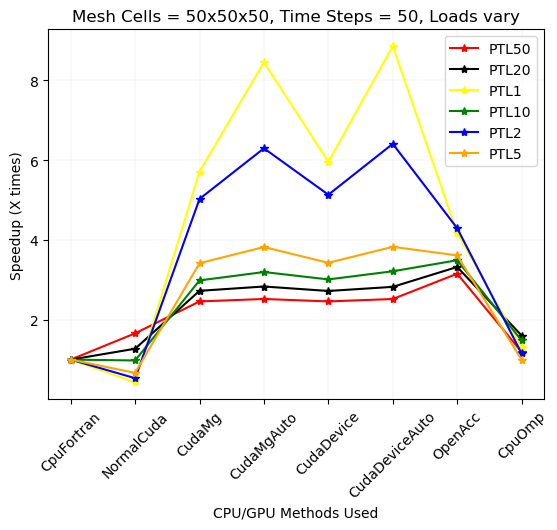

['PTT50.csv', 'PTT10.csv', 'PTT100.csv', 'PTT500.csv', 'PTT200.csv', 'PTT20.csv']

----print the simulation times of various method---------

            Types     PTT50     PTT10    PTT100    PTT500    PTT200     PTT20
0      CpuFortran  0.370251  0.071324  0.725413  3.558126  1.465653  0.151510
1      NormalCuda  0.538758  0.401952  0.706351  2.162176  1.081397  0.431655
2          CudaMg  0.104061  0.024514  0.207703  1.028816  0.415351  0.046079
3      CudaMgAuto  0.094485  0.021376  0.183853  0.913677  0.366609  0.040598
4      CudaDevice  0.103211  0.022958  0.205910  1.027195  0.411283  0.045219
5  CudaDeviceAuto  0.091578  0.020322  0.183391  0.911738  0.365664  0.040265
6         OpenAcc  0.097653  0.022404  0.194656  0.965020  0.387794  0.043044
7          CpuOmp  0.234578  0.083494  0.460908  2.162964  0.836393  0.083282

----print the spead up X times compared to the pure cpu fortran method---------

            Types     PTT50     PTT10    PTT100    PTT500    PTT200     PT

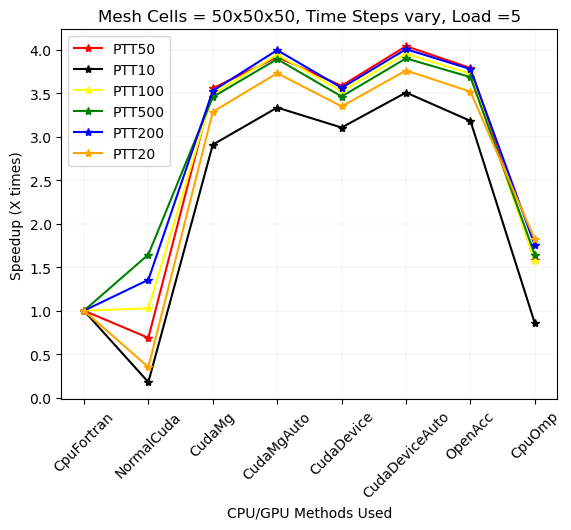

['PTM10.csv', 'PTM50.csv', 'PTM20.csv', 'PTM100.csv', 'PTM500.csv', 'PTM200.csv']

----print the simulation times of various method---------

            Types     PTM10     PTM50     PTM20    PTM100      PTM500     PTM200
0      CpuFortran  0.001509  0.393037  0.015113  3.845533  1435.47000  77.685020
1      NormalCuda  0.341521  0.501400  0.361756  1.363158   110.07480   7.512348
2          CudaMg  0.010235  0.103997  0.013030  0.687594    75.77109   4.904660
3      CudaMgAuto  0.003867  0.092363  0.009806  0.691258    68.58576   4.768219
4      CudaDevice  0.009731  0.103298  0.012366  0.682944    75.15085   4.842951
5  CudaDeviceAuto  0.003355  0.091879  0.009146  0.690029    68.03423   4.744424
6         OpenAcc  0.003275  0.098325  0.008517  0.757030    91.16217   5.963792
7          CpuOmp  0.001717  0.327360  0.012114  3.006943   557.96120  24.760840

----print the spead up X times compared to the pure cpu fortran method---------

            Types     PTM10     PTM50     PTM20

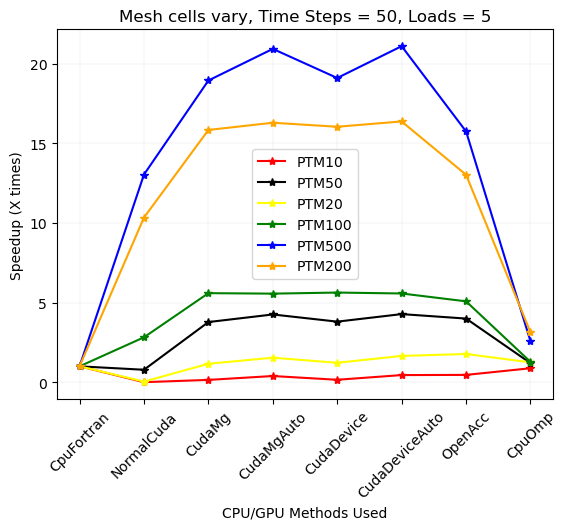

In [13]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import os
import glob
import pdb

os.chdir('/notebooks/CUDA/cuda_fortran/')

dlist = ['PTL','PTT','PTM']
titles = ['Mesh Cells = 50x50x50, Time Steps = 50, Loads vary',          'Mesh Cells = 50x50x50, Time Steps vary, Load =5',          'Mesh cells vary, Time Steps = 50, Loads = 5']
colors=['red','black','yellow','green','blue','orange','purple','brown','pink','gray','olive','cyan']
k=0

for folder in dlist:
    #pdb.set_trace()
    tmp_title = titles[k]
    k=k+1
    
    os.chdir(folder)
    files = glob.glob("*.csv")
    print(files)
    df_PT= pd.DataFrame(['CpuFortran', 'NormalCuda', 'CudaMg', 'CudaMgAuto', 'CudaDevice','CudaDeviceAuto','OpenAcc','CpuOmp'],columns=['Types'])
    #print(df_PT)
    for filename in files:
        df = pd.read_csv(filename, names=['test_kinds','time'],delimiter=':')
        tmp_fn = filename.split(".")[0]
        #print(tmp_fn)
        df_PT[tmp_fn]=df[['time']]
        #print(df.to_string())   
    print('\n----print the simulation times of various method---------\n')
    print(df_PT.to_string())
    
    # Normalize to get the speedup X times
    for j in range(len(df_PT.columns)-1):
        df_PT.iloc[:,j+1]=df_PT.iloc[0,j+1]/df_PT.iloc[:,j+1]
    print('\n----print the spead up X times compared to the pure cpu fortran method---------\n')
    print(df_PT)
    #print(df_PTL['Types'])
    print('\n----Visualization the perofrmance test results---------\n')
    i=0
    for filename in files:
        tmp_fn= filename.split(".")[0]
        plt.plot(df_PT['Types'], df_PT[tmp_fn], marker='*',color=colors[i], label=tmp_fn)
        i=i+1
    plt.xlabel("CPU/GPU Methods Used")
    plt.ylabel("Speedup (X times)")
    plt.title(tmp_title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(color='gray',linewidth=0.068)
    plt.show()
    os.chdir('..')
